<a href="https://colab.research.google.com/github/lhfranca/ImersaoDados/blob/main/Aula01_Desafios_ImersaoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
#Importando as bibliotecas que serão utilizadas nos Desafios.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#Obtendo nossa fonte de dados (Amostra do ENEM)

fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/ddff4f29df0d6470dd59910553899e549d0b5806/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


#**Nota**

Irei fazer minhas pesquisas a nível Nacional e também a nivel Municipal, analisando os dados de Sorocaba.

In [53]:
dados_br = dados
dados_sor = dados.query('NO_MUNICIPIO_RESIDENCIA =="Sorocaba"')

## **Desafio 01**
Descobir qual a proporção de inscritos por idade.

In [54]:
#Aqui estou obtendo a quantidade de inscritos por idade e classificando da menor idade para a maior.

idade_br = dados_br['NU_IDADE'].value_counts().sort_index()
idade_sor = dados_sor['NU_IDADE'].value_counts().sort_index()

#Aqui vamos obter a proporção, utilizando o método value_count e definindo a normalize como True, conseguimos esse resultado.
prop_br = round(dados_br['NU_IDADE'].value_counts(normalize=True).sort_index() , 5) *100
prop_sor = round(dados_sor['NU_IDADE'].value_counts(normalize=True).sort_index(), 5)*100

print(prop_br.head())
print(prop_sor.head())

13     0.003
14     0.111
15     1.577
16     6.147
17    16.687
Name: NU_IDADE, dtype: float64
15     0.627
16     6.270
17    32.288
18    15.987
19     8.150
Name: NU_IDADE, dtype: float64


#Desafio 02

Descobrir de quais Estados são os Inscritos com 13 anos.

In [55]:
#Para isso, filtramos todo o nosso DataFrame, utilziando o método query, caso a idade fosse igual a 13. Logo após isso, selecionamos apenas a coluna da SF_UF_RESIDENCIA
treze_br = dados_br.query('NU_IDADE == 13')
treze_br = treze_br["SG_UF_RESIDENCIA"]
treze_br

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

# **Desafio 03**

Adicionar título no gráfico.

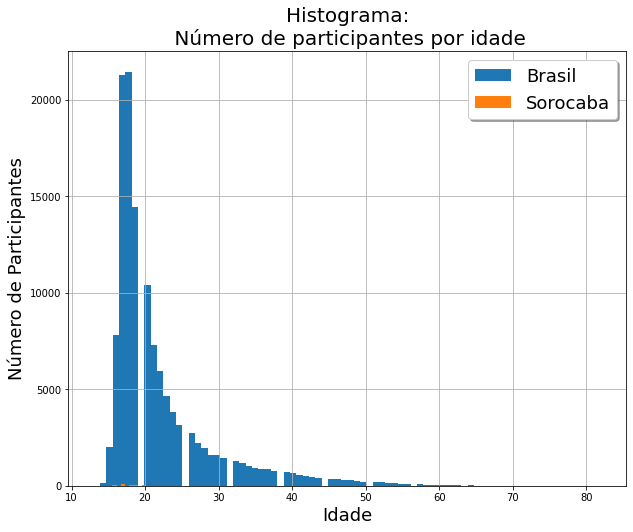

In [56]:
plt.subplot(dados_br['NU_IDADE'].hist(legend = True, bins=80, figsize = (10,8)))
plt.subplot(dados_sor['NU_IDADE'].hist(legend = True, bins=80, figsize = (10,8) ))

#parâmetros do gráfico
plt.xlabel('Idade',fontsize = 18)
plt.ylabel('Número de Participantes',fontsize = 18)
plt.title('Histograma:\n Número de participantes por idade',fontsize = 20)
plt.grid(True)

#legenda do gráfico
plt.legend(('Brasil', 'Sorocaba'),
           loc='upper right', shadow = True,fontsize = 18)

plt.show()



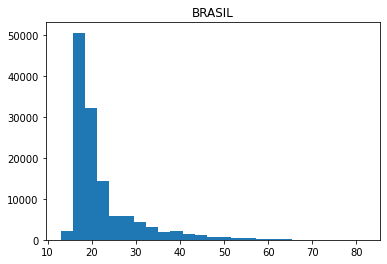

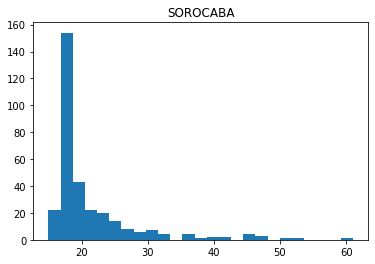

In [70]:
#Como criar dois histogramas utilizando o método subplots. Dessa maneira não ficou muito visual os nossos dados, foi constatado que o histograma
# não fica muito eficiente para esses dados.

fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
ax.hist(dados_br['NU_IDADE'], bins = 25)
ax1.hist(dados_sor['NU_IDADE'], bins = 25)
ax.set_title("BRASIL")
ax1.set_title("SOROCABA")
plt.show()

# **Desafio 04**

Criar 2 histogramas com as idades dos treineiros e não treineiros.

<Figure size 7200x7200 with 0 Axes>

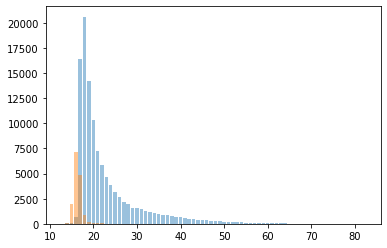

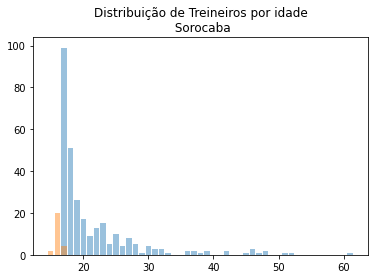

In [126]:
#Não irei fazer outro histograma, pois já utilizei esse método duas vezes e não gostei muito do resultado.

#Primeiro irei obter a quantidade de inscritos que fizeram a prova como treineiro, por idade.
idade_trei_br = dados_br.query("IN_TREINEIRO == 1")['NU_IDADE'].value_counts()
idade_trei_sor = dados_sor.query("IN_TREINEIRO == 1")['NU_IDADE'].value_counts()

#Segundo irei obter a quantidade de inscritos que não fizeram a prova como treineiro, por idade.
idade_n_trei_br = dados_br.query("IN_TREINEIRO == 0")['NU_IDADE'].value_counts()
idade_n_trei_sor = dados_sor.query("IN_TREINEIRO == 0")['NU_IDADE'].value_counts()

plt.figure(figsize=(100,100))
fig, ax2 = plt.subplots()

fig, ax3 = plt.subplots()



ax2.bar(idade_n_trei_br.index, idade_n_trei_br , label = "Brasil", alpha = 0.45)
ax2.bar(idade_trei_br.index, idade_trei_br , label = "Brasil", alpha = 0.45)
plt.title("Distribuição de Treineiros por idade\n Brasil")

ax3.bar(idade_n_trei_sor.index, idade_n_trei_sor , label = "Sorocaba", alpha = 0.45)
ax3.bar(idade_trei_sor.index, idade_trei_sor , label = "Sorocaba", alpha = 0.45)
plt.title("Distribuição de Treineiros por idade\n Sorocaba")

plt.show()

#Ainda não fiquei satistfeito com os gráficos gerados, mas isso é por conta da minha falta de experiência com o matplotlib e seaborn, os próximos serão mais detalhados.

# **Desafio 05**

Comparar as distribuições das provas de inglês e espanhol.

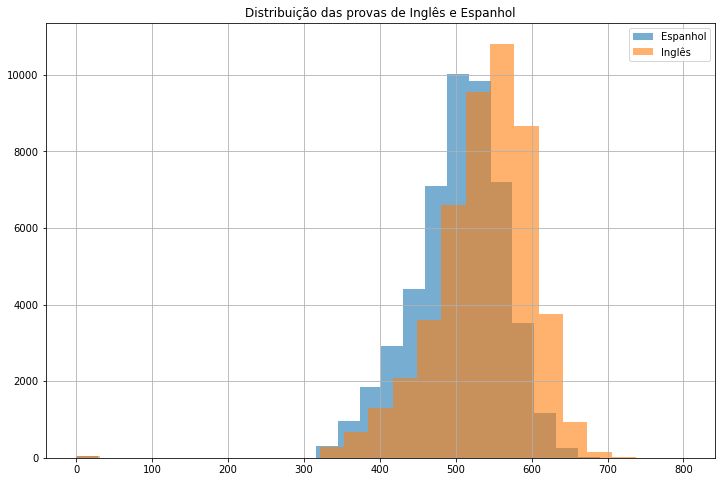

In [131]:
#Obtendo os dados e plotando os histogramas.

pe_br = dados_br.query("TP_LINGUA == 1")['NU_NOTA_LC'].hist(bins = 25, figsize = (12,8), alpha = 0.6)
in_br = dados_br.query("TP_LINGUA == 0")['NU_NOTA_LC'].hist(bins = 25, figsize = (12,8), alpha = 0.6)

plt.title("Distribuição das provas de Inglês e Espanhol")
plt.legend(["Espanhol", "Inglês"])